In [129]:
import numpy as np
import random
import matplotlib.pyplot as plt
import scipy.stats as st
import sympy as s
from matplotlib.colors import ListedColormap
from copy import copy

# Project 2


## Exercise 1

In [237]:
class Ising():
    
    def __init__(self, D=1, N=20,J=1,T=1, H=0):
        self.D=D
        self.N=N
        self.J = J
        self.H = H
        self.T=T
        return
    
    def energy1d(self):
        
        e = 0
        for i in range(len(self.state)-1):
            e += self.state[i]*self.state[i+1]
        e+=self.state[0]*self.state[-1]
        
        return -self.J*e
    
    def M1d(self):
        #return -self.H*sum(self.state)
        return sum(self.state)
    def step1d(self):
        N = self.N
        i = np.random.randint(0,N)
        dirs = [1,-1]
        e = 0
        for a in dirs:
            e += self.state[i%N]*self.state[(i+a)%N]
        dE = -(-2*e)*self.J
        #dM = -self.H*(-2*self.state[i%N])
        dM = -2*self.state[i%N]
        prob = min([1,np.exp(-(dE-self.H*dM)/self.T)])
        r = np.random.uniform(0,1)
        if r<prob:
            self.state[i] = -self.state[i]
            self.Energy_history.append(self.Energy_history[-1]+dE)
            self.M_history.append(self.M_history[-1]+dM)
            return 
        else:
            self.Energy_history.append(self.Energy_history[-1])
            self.M_history.append(self.M_history[-1])
        return 
    
    def energy2d(self):
        N = self.N
        dirs = [(1,0),(0,1)]
        e = 0
        for i in range(len(self.state)):
            for j in range(len(self.state)):
                for a,b in dirs:
                    e += self.state[i%N][j%N]*self.state[(i+a)%N][(j+b)%N]
        
        return -self.J*e

    def M2d(self):
        #return -self.H*sum([sum(self.state[i]) for i in range(self.N)])
        return sum([sum(self.state[i]) for i in range(self.N)])
    
    def step2d(self):
        N = self.N
        i = np.random.randint(0,N)
        j = np.random.randint(0,N)
        dirs = [(1,0),(0,1),(-1,0),(0,-1)]
        e = 0
        for a,b in dirs:
            e += self.state[i%N][j%N]*self.state[(i+a)%N][(j+b)%N]
        dE = -(-2*e)*self.J
        #dM = -self.H*(-2*self.state[i%N][j%N])
        dM = (-2*self.state[i%N][j%N])
        prob = min([1,np.exp(-(dE-self.H*dM)/self.T)])
        r = np.random.uniform(0,1)
        if r<prob:
            self.state[i][j] = -self.state[i][j]
            self.Energy_history.append(copy(self.Energy_history[-1])+dE)
            self.M_history.append(copy(self.M_history[-1])+dM)
            return 
        else:
            self.Energy_history.append(copy(self.Energy_history[-1]))
            self.M_history.append(copy(self.M_history[-1]))
        return
    
    def simulation(self, L, snapshot=[]):
        if self.D==1:
            self.state= [(1) for i in range(self.N)]
            def energy():
                return self.energy1d()
            def Magnetisation():
                return self.M1d()
            def step():
                return self.step1d()
        elif self.D==2:
            self.state= [[(1) for i in range(self.N)] for i in range(self.N)]
            def energy():
                return self.energy2d()
            def Magnetisation():
                return self.M2d()
            def step():
                return self.step2d()
        self.Energy_history = [energy()]
        self.M_history = [Magnetisation()]
        self.state_history = [copy(self.state)]
        if not snapshot:
            for i in range(L):
                step()
        else:
            for i in range(L):
                step()
                if i in snapshot:
                    self.state_history.append(copy(self.state))
        return self.Energy_history, self.M_history
    
    def simulation_ensemble(self, M,L):
        
        Energy_ensemble = []
        Magnetisation_ensemble = []
        
        for i in range(M):
            E_sim, M_sim =self.simulation(L, snapshot=[])
            Energy_ensemble.append(E_sim)
            Magnetisation_ensemble.append(M_sim)
        mean_Energy = []
        mean_Energysquared = []
        std_Energy = []
        mean_magnetisation = []
        CV = []

        for j in range(L):
            mean_Energy.append(sum([Energy_ensemble[i][j] for i in range(M)])/M)
            mean_Energysquared.append(sum([Energy_ensemble[i][j]**2 for i in range(M)])/M)
            std_Energy.append(np.sqrt((mean_Energysquared[j]-mean_Energy[j]**2)/M))
            mean_magnetisation.append(sum([Magnetisation_ensemble[i][j] for i in range(M)])/M)
            CV.append((mean_Energysquared[j]-mean_Energy[j]**2)/self.T**2)
        
        return mean_Energy, std_Energy, mean_magnetisation, CV

    def mean_over_simulations_and_time(self, M=100, L=10000,eq=1000):
        N=self.N
        T=self.T
        mean_Energy, fsd, mean_magnetisation,std_Energy  = self.simulation_ensemble(M=M,L=L)
        time_average = sum(mean_Energy[eq:])/len(mean_Energy[eq:])/N
        time_average_cV = sum(np.array(std_Energy[eq:]))/len(std_Energy[eq:])/N
        time_average_magnetisation = sum(mean_magnetisation[eq:])/len(mean_magnetisation[eq:])/N
        return time_average, time_average_cV, time_average_magnetisation
 

### a)

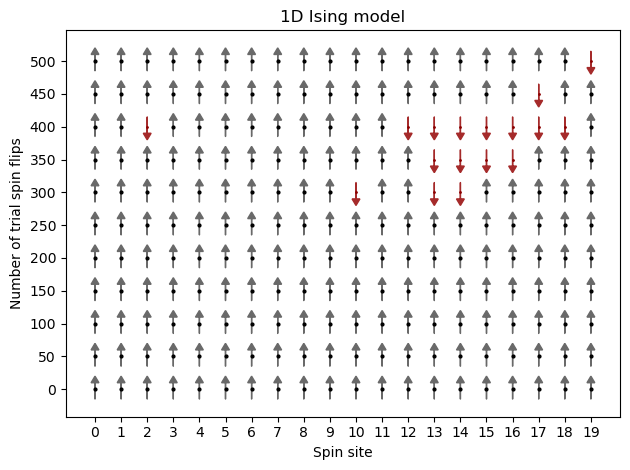

In [314]:
s = Ising(D=1, N=20,J=1,T=1, H=0)
snapshot = [0,50,100,150,200,250,300,350,400,450,500]
s.simulation(L=500, snapshot=snapshot)
for i in range(len(snapshot)):
    state = s.state_history[i]
    for j in range(len(s.state)):
        #P.show()

        if state[j]==1:
            
            P.arrow( j, snapshot[i]-15, 0.0, 25, fc="dimgrey", ec="dimgrey",
                 head_width=0.3, head_length=10 )
            plt.plot(j, snapshot[i], 'o',color ="k", ms = 2, label = 'up')
        elif state[j]==-1: 
            
            P.arrow( j, snapshot[i]+15, 0.0, -25, fc="brown", ec="brown",
                 head_width=.3, head_length=10 )
            plt.plot(j, snapshot[i], 'o',color="darkred", ms = 1, label = 'down')

plt.xticks(range(20))
plt.yticks(snapshot)
plt.xlabel("Spin site")
plt.ylabel("Number of trial spin flips")
plt.title("1D Ising model")
#plt.grid()
plt.tight_layout()
plt.savefig("svst.pdf")

### b)

In [315]:
lines = ['dashdot','dashed','solid']
color = ['brown','tab:purple','darkseagreen']

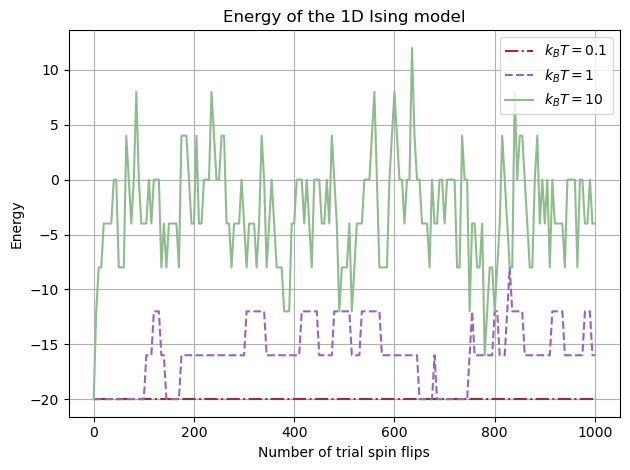

In [317]:
Temps = [0.1,1,10]
L =1000
n=5
for t in range(3):
    s = Ising(D=1, N=20,J=1,T=Temps[t], H=0)
    Energy_history, M_history = s.simulation(L, snapshot=[])
    Energy_history, M_history =np.array(Energy_history) , np.array(M_history)
    time = np.array([i for i in range(len(Energy_history))])
    plt.plot(time[0:len(time):n],Energy_history[0:len(time):n],label = "$k_BT =$"+str(Temps[t])\
             ,color = color[t],linestyle =lines[t] )
plt.legend()
plt.ylabel("Energy")
plt.xlabel("Number of trial spin flips")
plt.grid()
plt.title("Energy of the 1D Ising model")
plt.tight_layout()
plt.savefig("e.pdf")

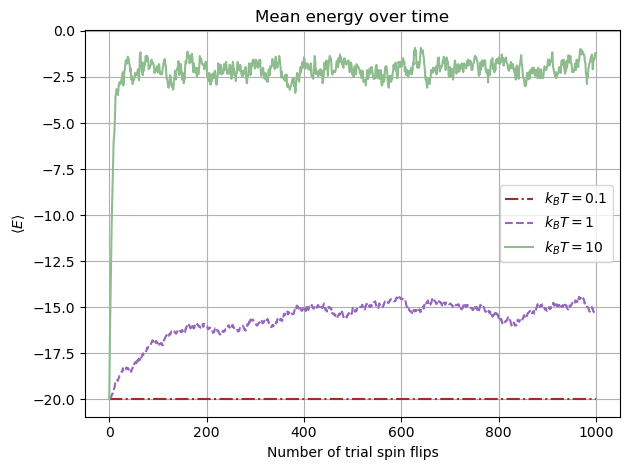

In [318]:
M=100
L=1000
Temps = [0.1,1,10]
L =1000
n=5
for t in range(3):
    s = Ising(D=1, N=20,J=1,T=Temps[t], H=0)
    mean_Energy, std_Energy, m,c = s.simulation_ensemble(M,L)
    time = np.array([i for i in range(len(mean_Energy))])
    plt.plot(time,mean_Energy,label = "$k_BT =$"+str(Temps[t])\
             ,color = color[t],linestyle =lines[t] )
plt.xlabel("Number of trial spin flips")
plt.ylabel(r'$\langle E \rangle$')
plt.title("Mean energy over time")
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig("et.pdf")

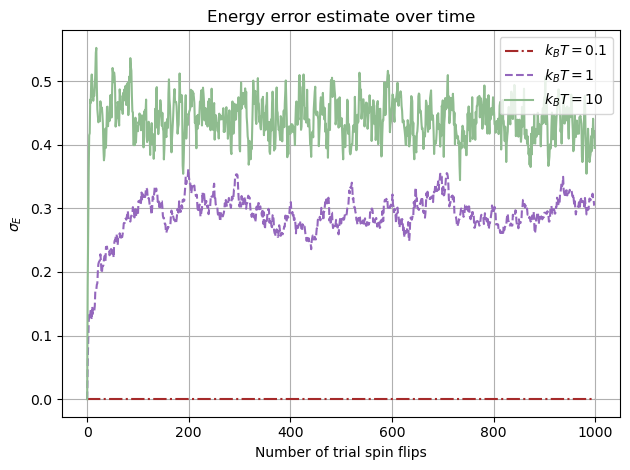

In [319]:
M=100
L=1000
Temps = [0.1,1,10]
L =1000
n=5
for t in range(3):
    s = Ising(D=1, N=20,J=1,T=Temps[t], H=0)
    mean_Energy, std_Energy, m,c = s.simulation_ensemble(M,L)
    time = np.array([i for i in range(len(std_Energy))])
    plt.plot(time,std_Energy,label = "$k_BT =$"+str(Temps[t])\
             ,color = color[t],linestyle =lines[t] )
plt.xlabel("Number of trial spin flips")
plt.ylabel(r'$\sigma_E$')
plt.title("Energy error estimate over time")
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig("se.pdf")

### c)

In [216]:
def theory_E_N_t(J=1,T=1):
    return np.tanh(J/T)*(-J)

def theory_Cv(J=1,T=1):
    return (J/T)**2/np.cosh(J/T)**2
def theory_m(J=1,T=1, H=0):
    return np.exp(J/T)*np.sinh(H/T)/np.sqrt( np.exp(2*J/T)*np.sinh(H/T)**2+np.exp(-2*J/T))
    

In [225]:
kbT = np.linspace(0.1,10)
E = []
Cv = []
for t in kbT:
    s = Ising(D=1, N=20,J=1,T=t, H=0)
    e, cv, m = s.mean_over_simulations_and_time(M=100, L=2000,eq=1000)
    E.append(e)
    Cv.append(cv)
    

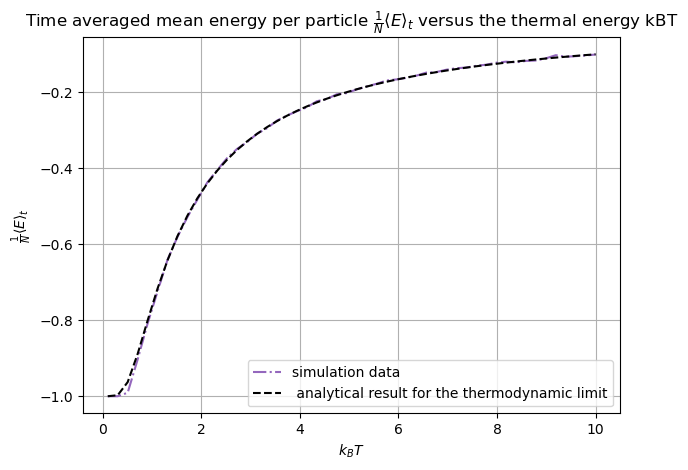

In [320]:
plt.plot(kbT,E, label ="simulation data",linestyle=lines[0],color=color[1])
plt.plot(kbT,theory_E_N_t(1, kbT),color='k',linestyle=lines[1], label =" analytical result for the thermodynamic limit")
plt.legend()
plt.grid()
plt.xlabel(r'$k_BT$')
plt.ylabel(r'$\frac{1}{N}\langle E \rangle_t$')
plt.title("Time averaged mean energy per particle $\\frac{1}{N}\\langle E \\rangle_t$ versus the thermal energy kBT")
plt.tight_layout()
plt.savefig("see.pdf")

### d)

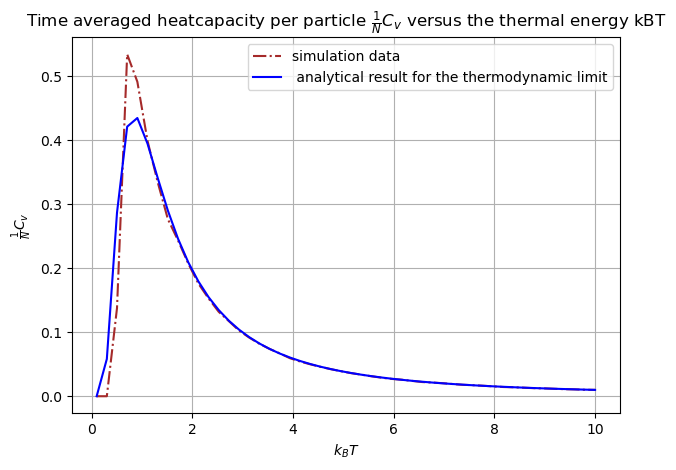

In [321]:
plt.plot(kbT,np.array(Cv), label ="simulation data",linestyle=lines[0],color=color[0])
plt.plot(kbT,theory_Cv(1, kbT),color='b', label =" analytical result for the thermodynamic limit")
plt.legend()
plt.grid()
plt.xlabel(r'$k_BT$')
plt.ylabel(r'$\frac{1}{N}C_v$')
plt.title("Time averaged heatcapacity per particle $\\frac{1}{N}C_v$ versus the thermal energy kBT")
plt.tight_layout()
plt.savefig("cv.pdf")

### e)

In [142]:
H = [0,.1,1]
Magnetization = []
for h in H:
    Mag =[]
    for t in kbT:
        s = Ising(D=1, N=20,J=1,T=t, H=h)
        e, cv, m = s.mean_over_simulations_and_time(M=100, L=2000,eq=1000)
        Mag.append(m)
    Magnetization.append(Mag)
        

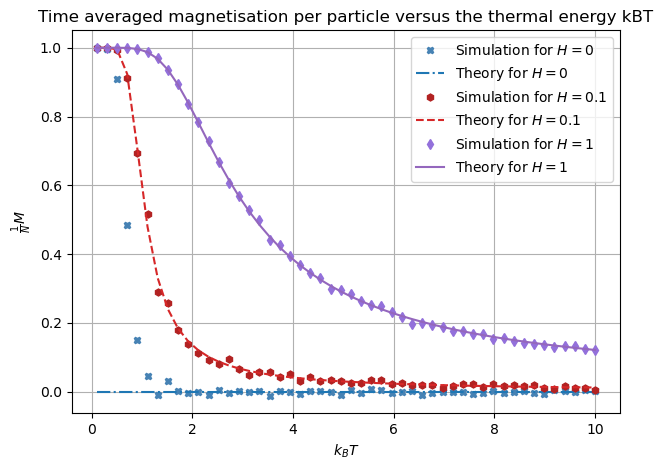

In [323]:
c = ['tab:blue', 'tab:red', 'tab:purple']
c2 =['steelblue', 'firebrick','mediumpurple']
s = ['X','h','d']
for i in range(3):
    plt.plot(kbT,np.array(Magnetization[i][:50]),s[i],ms=5,label=r'Simulation for $H=$'+str(H[i])\
             ,color=c2[i])
    
    plt.plot(kbT,theory_m(J=1,T=kbT, H=H[i]),label=r'Theory for $H=$'+str(H[i]) ,color= c[i],linestyle =lines[i])
plt.grid()
plt.xlabel(r'$k_BT$')
plt.ylabel(r'$\frac{1}{N}M$')
plt.title("Time averaged magnetisation per particle versus the thermal energy kBT")
plt.legend()
plt.tight_layout()
plt.savefig("m.pdf")

## Exercise 2

In [207]:
def theory_m2D(T,J):
    if T>2.269185*J:
        return 0
    else:
        z = np.exp(-2*J/T)
        return (1+z**2)**(1/4)*(1-6*z**2+z**4)**(1/8) / np.sqrt(1-z**2)


In [325]:
M=100
L=10000
eq=5000
n=5
S = Ising(D=2, N=30,J=1,T=1, H=0)
mean_Energy, std_Energy, m,c = S.simulation_ensemble(M,L)

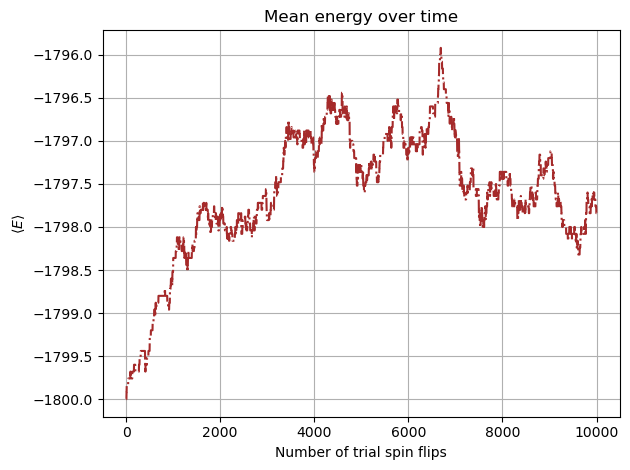

In [327]:

time = np.array([i for i in range(len(mean_Energy))])
plt.plot(time,mean_Energy,label = "$k_BT =$"+str(Temps[0])\
             ,color = color[0],linestyle =lines[0] )
plt.xlabel("Number of trial spin flips")
plt.ylabel(r'$\langle E \rangle$')
plt.title("Mean energy over time")
plt.grid()
plt.tight_layout()
plt.savefig("e2d.pdf")

In [243]:
Mag2D =[]
for t in kbT:
    S = Ising(D=2, N=30,J=1,T=t, H=0)
    e, cv, m = S.mean_over_simulations_and_time(M=100, L=10000,eq=5000)
    Mag.append(m)


In [248]:
magtheo = []
for t in kbT:
    magtheo.append(theory_m2D(T=t,J=1))

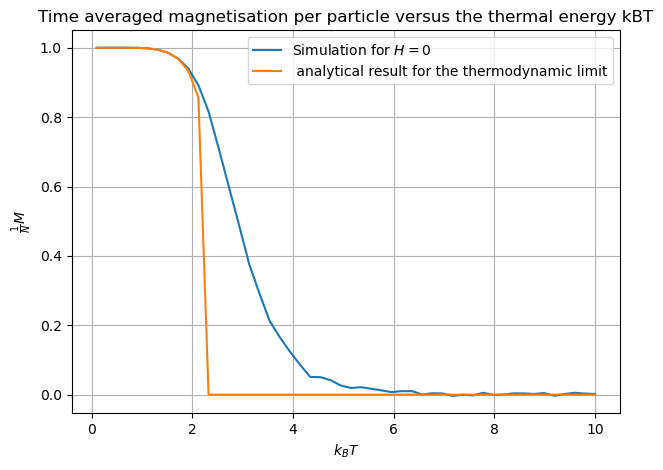

In [338]:
plt.plot(kbT,np.array(Mag[50:])/30,label=r'Simulation for $H=0$')
plt.plot(kbT, magtheo, label =" analytical result for the thermodynamic limit")
plt.grid()
plt.xlabel(r'$k_BT$')
plt.ylabel(r'$\frac{1}{N}M$')
plt.title("Time averaged magnetisation per particle versus the thermal energy kBT")
plt.legend()
plt.tight_layout()
plt.savefig("m2d.pdf")

In [330]:
np.save("m2d", Mag[50:])
